In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 


import squarify
# sns.set()

In [3]:
!apt_get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/nanum
!rm -rf ~/.cache/matplotlib > /dev/null


mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.


In [56]:
df1 = pd.read_csv('관광검색건수/20230508100008_방문자수 히트맵.csv', encoding='cp949')
df2 = pd.read_csv('관광검색건수/20230508100008_유형별 검색건수.csv', encoding='cp949')
df3 = pd.read_csv('관광검색건수/20230508100008_지역별 검색건수 추이.csv', encoding='cp949')
df4 = pd.read_csv('관광검색건수/20230508100008_지역별 검색건수.csv', encoding='cp949')

In [5]:
df1.head()
# 시별 pie chart or/and treemap

,광역지자체,검색건수,전년동기 검색건수,전년대비 검색증감률
0,서울특별시,271566213,199104663,36.4
1,부산광역시,85921938,62570124,37.3
2,대구광역시,42355055,29725116,42.5
3,인천광역시,104302863,76261334,36.8
4,광주광역시,23442737,16780706,39.7


In [6]:
df2.head()
# groupby 카테고리중분류 value sum:유형별 검색건수, 유형별검색건수비율
# 첫번째 자연관광 먼저  그다음 두번째 자연관광내 분류들 다시 


,티맵카테고리중분류명,티맵카테고리중분류명.1,유형별 검색건수,유형별 검색건수 비율
0,자연관광,자연생태,1699506,0.1
1,자연관광,자연관광(산),74164,0.0
2,자연관광,자연공원,15715437,0.9
3,자연관광,자연경관(하천/해양),73011072,4.0
4,자연관광,기타자연관광,10,0.0


In [7]:
df3.head()
# 4개 년도 별 막대플롯, 각 플롯내에 색깔별로 카테고리

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2018,전국,전체,219563508,0
1,2018,전국,자연관광,14424065,0
2,2018,전국,역사관광,7556958,0
3,2018,전국,체험관광,1718120,0
4,2018,전국,문화관광,30587319,0


In [8]:
df4.head()

,광역지자체,기초지자체,광역지자체 검색건수,광역지자체 검색건수 비율,기초지자체 검색건수,기초지자체 검색건수 비율
0,강원도,강릉시,175905916,9.7,28219783,16.0
1,강원도,고성군,175905916,9.7,9318905,5.3
2,강원도,동해시,175905916,9.7,3341178,1.9
3,강원도,삼척시,175905916,9.7,9428043,5.4
4,강원도,속초시,175905916,9.7,26354581,15.0


In [9]:
df1

,광역지자체,검색건수,전년동기 검색건수,전년대비 검색증감률
0,서울특별시,271566213,199104663,36.4
1,부산광역시,85921938,62570124,37.3
2,대구광역시,42355055,29725116,42.5
3,인천광역시,104302863,76261334,36.8
4,광주광역시,23442737,16780706,39.7
5,대전광역시,29875122,20694229,44.4
6,울산광역시,21695995,15392378,41.0
7,세종특별자치시,10453260,7355409,42.1
8,경기도,550921533,393194438,40.1
9,강원도,175905354,128745589,36.6


In [10]:
city_names = df1['광역지자체']
city_names

0       서울특별시
1       부산광역시
2       대구광역시
3       인천광역시
4       광주광역시
5       대전광역시
6       울산광역시
7     세종특별자치시
8         경기도
9         강원도
10       충청북도
11       충청남도
12       전라북도
13       전라남도
14       경상북도
15       경상남도
16    제주특별자치도
Name: 광역지자체, dtype: object

In [11]:
type(city_names)

pandas.core.series.Series

In [12]:
city_list = city_names.tolist()
len(city_list)

17

In [13]:
search_values = df1['검색건수'].tolist()
search_values

[271566213,
 85921938,
 42355055,
 104302863,
 23442737,
 29875122,
 21695995,
 10453260,
 550921533,
 175905354,
 50016833,
 82842846,
 50425235,
 61899939,
 77334328,
 97062975,
 77002386]

In [14]:

# fig = px.treemap(
#     names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"]
# )
# fig.update_traces(root_color="lightgrey")
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

(0.0, 100.0, 0.0, 100.0)

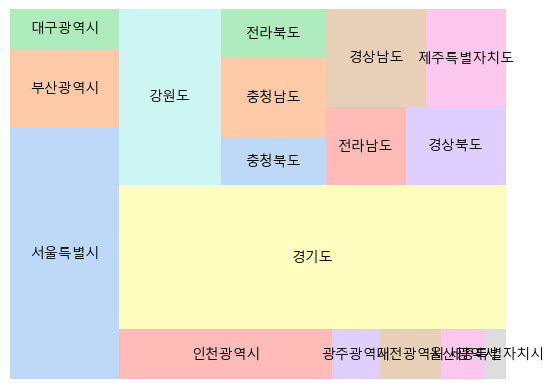

In [34]:
# Sample data
values = search_values
labels = city_list
# colors = ['#91DCEA', '#64CDCC', '#5FBB68',
#           '#F9D23C', '#F9A729', '#FD6F30']
colors = sns.color_palette("pastel")
# Treemap
squarify.plot(sizes = values, label = labels,
              color = colors,
              alpha = 0.7)

# Remove the axis:
plt.axis("off")

# plt.show()


###################################################
###################################################
# combine last 6-7 as etc

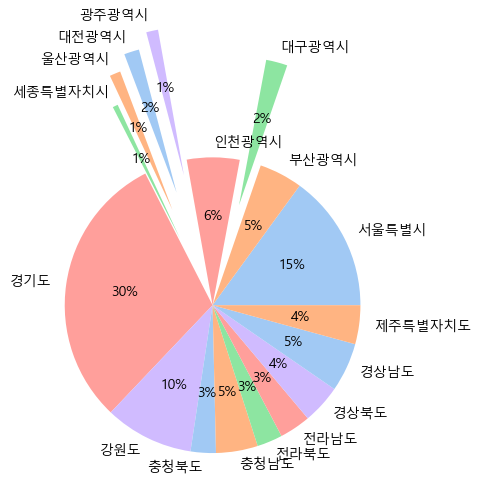

In [16]:
#define data
data = search_values
labels = city_list

#https://lifewithdata.com/2022/03/07/how-to-create-a-pie-chart-in-matplotlib/
explode = [0, 0, 0.7, 0, 0.9, 0.8, 0.7, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=explode)
plt.show()

In [40]:
df2

,티맵카테고리중분류명,티맵카테고리중분류명.1,유형별 검색건수,유형별 검색건수 비율
0,자연관광,자연생태,1699506,0.1
1,자연관광,자연관광(산),74164,0.0
2,자연관광,자연공원,15715437,0.9
3,자연관광,자연경관(하천/해양),73011072,4.0
4,자연관광,기타자연관광,10,0.0
5,자연관광,자연경관(산),14799640,0.8
6,역사관광,종교성지,29602937,1.6
7,역사관광,역사유적지,27082612,1.5
8,역사관광,역사유물,619214,0.0
9,체험관광,공예체험,57052,0.0


In [18]:
df2_group = df2.groupby('티맵카테고리중분류명').sum()
df2_group
# 첫번째 9가지 클래스

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8472\631191521.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_group = df2.groupby('티맵카테고리중분류명').sum()


,유형별 검색건수,유형별 검색건수 비율
티맵카테고리중분류명,,
기타관광,86939102,4.8
레저스포츠,98368010,5.4
문화관광,206465796,11.5
쇼핑,382366832,21.0
숙박,208385484,11.5
역사관광,57304763,3.1
음식,658574883,36.4
자연관광,105299829,5.8
체험관광,9319913,0.5


In [19]:
df2_group.sort_values(by=['유형별 검색건수', '유형별 검색건수 비율'], ascending=False)

,유형별 검색건수,유형별 검색건수 비율
티맵카테고리중분류명,,
음식,658574883,36.4
쇼핑,382366832,21.0
숙박,208385484,11.5
문화관광,206465796,11.5
자연관광,105299829,5.8
레저스포츠,98368010,5.4
기타관광,86939102,4.8
역사관광,57304763,3.1
체험관광,9319913,0.5


In [43]:
#df2 = pd.read_csv('관광검색건수/20230508100008_유형별 검색건수.csv', encoding='cp949')
자연관광 = df2[(df2['티맵카테고리중분류명'] == '자연관광')]
자연관광

,티맵카테고리중분류명,티맵카테고리중분류명.1,유형별 검색건수,유형별 검색건수 비율
0,자연관광,자연생태,1699506,0.1
1,자연관광,자연관광(산),74164,0.0
2,자연관광,자연공원,15715437,0.9
3,자연관광,자연경관(하천/해양),73011072,4.0
4,자연관광,기타자연관광,10,0.0
5,자연관광,자연경관(산),14799640,0.8


In [44]:
자연내_카테고리 = df2[(df2['티맵카테고리중분류명'] == '자연관광')].groupby('티맵카테고리중분류명.1').sum()
자연내_카테고리

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8472\3192973727.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  자연내_카테고리 = df2[(df2['티맵카테고리중분류명'] == '자연관광')].groupby('티맵카테고리중분류명.1').sum()


,유형별 검색건수,유형별 검색건수 비율
티맵카테고리중분류명.1,,
기타자연관광,10,0.0
자연경관(산),14799640,0.8
자연경관(하천/해양),73011072,4.0
자연공원,15715437,0.9
자연관광(산),74164,0.0
자연생태,1699506,0.1


In [ ]:
# Nested pie charts 
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

#https://stackoverflow.com/questions/67210640/how-can-i-draw-a-nested-pie-graph-in-matplotlib-in-python

In [63]:
df2 = df2.drop(columns='유형별 검색건수 비율')

KeyError: "['유형별 검색건수 비율'] not found in axis"

In [64]:
outer = df2.groupby('티맵카테고리중분류명').sum()
outer

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8472\1512104035.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = df2.groupby('티맵카테고리중분류명').sum()


,유형별 검색건수
티맵카테고리중분류명,
기타관광,86939102
레저스포츠,98368010
문화관광,206465796
쇼핑,382366832
숙박,208385484
역사관광,57304763
음식,658574883
자연관광,105299829
체험관광,9319913


In [65]:
inner = df2.groupby(['티맵카테고리중분류명', '티맵카테고리중분류명.1']).sum()
inner

유형별 검색건수
티맵카테고리중분류명 티맵카테고리중분류명.1           
기타관광       교통시설           49039552
           기타관광           35409488
           데이트코스           2490062
레저스포츠      기타레저스포츠         4136958
           수상레저스포츠         9253077
           육상레저스포츠        84858581
           항공레저스포츠          119394
문화관광       공연시설           38251870
           기타문화관광지        14032173
           도시/지역문화관광         56062
           도시공원           50201000
           랜드마크관광         10149494
           레저스포츠시설        10184068
           복합관광시설         12789331
           전시시설           36792234
           테마공원           34009564
쇼핑         기타쇼핑시설           864411
           대형마트          150896769
           면세점              941064
           백화점            70833108
           쇼핑몰            78692523
           시장             80124563
           전문매장/상가           14394
숙박         기타숙박            1484182
           모텔             33897279
           캠핑             19158633
           콘도미니엄          38862715
           펜션/민박          30633529
           호스텔             1963751
           호텔             82385395
역사관광       역사유물             619214
           역사유적지          27082612
           종교성지           29602937
음식         간이음식           79014391
           외국식            50890851
           음식점기타           6718112
           전문음식          125065378
           카페/찻집         132525166
           한식            264360985
자연관광       기타자연관광               10
           자연경관(산)        14799640
           자연경관(하천/해양)    73011072
           자연공원           15715437
           자연관광(산)           74164
           자연생태            1699506
체험관광       공예체험              57052
           농/산/어촌체험        3687755
           웰니스관광           5575106

In [80]:
# inner_labels = inner.index.get_level_values(1)

In [81]:
# cmap = plt.colormaps["tab20c"]
# outer_colors = cmap(np.arange(3)*4)
# outer_colors

In [75]:
# code for colors
# https://sharkcoder.com/data-visualization/mpl-nested-pie
a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6), g(.6), h(.6), i(.6)]

inner_colors = [a(.5), a(.4), a(.3),
                b(.4), b(.3), b(.2), b(.1),
                c(.7), c(.6), c(.5), c(.4), c(.3), c(.2), c(.1), c(5), c(6),
                d(.7), d(.6), d(.5), d(.4), d(.3), d(.2), d(.1),
                e(.7), e(.6), e(.5), e(.4), e(.3), e(.2), e(.1),
                f(.5), f(.4), f(.3),
                g(.6), g(.5), g(.4), g(.3), g(.2), g(.1),
                h(.6), h(.5), h(.4), h(.3), h(.2), h(.1),
                i(.5), i(.4), i(.3)
               ]

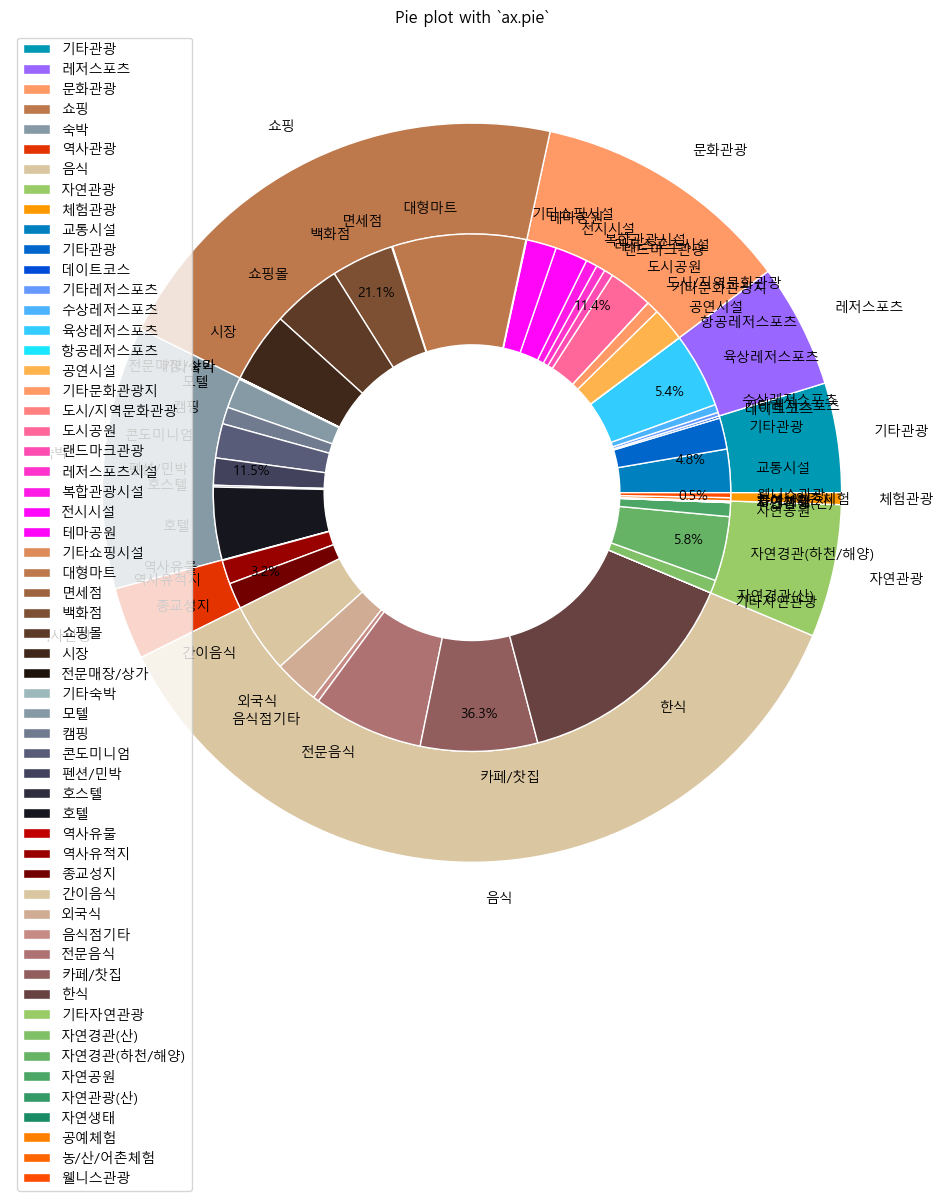

In [125]:
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
        colors=outer_colors, 
        labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       colors=inner_colors,
        labels = inner_labels,
       wedgeprops=dict(width=size, edgecolor='w'))
ax.legend()
ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [127]:
accom = df2[(df2['티맵카테고리중분류명'] == '숙박')]
accom

,티맵카테고리중분류명,티맵카테고리중분류명.1,유형별 검색건수
38,숙박,호스텔,1963751
39,숙박,모텔,33897279
40,숙박,펜션/민박,30633529
41,숙박,콘도미니엄,38862715
42,숙박,캠핑,19158633
43,숙박,기타숙박,1484182
44,숙박,호텔,82385395


In [129]:
accom = accom.sort_values(by=['유형별 검색건수'], ascending=False)
accom

,티맵카테고리중분류명,티맵카테고리중분류명.1,유형별 검색건수
44,숙박,호텔,82385395
41,숙박,콘도미니엄,38862715
39,숙박,모텔,33897279
40,숙박,펜션/민박,30633529
42,숙박,캠핑,19158633
38,숙박,호스텔,1963751
43,숙박,기타숙박,1484182


[82385395, 38862715, 33897279, 30633529, 19158633, 1963751, 1484182]

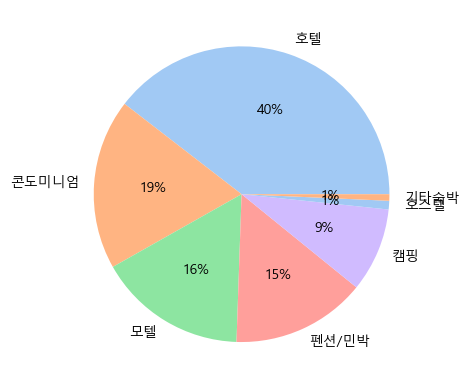

In [133]:
data = accom['유형별 검색건수'].tolist()
labels = accom['티맵카테고리중분류명.1'].tolist()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
#https://github.com/Ataraxia1001/tjoeun/blob/main/Python/Pandas/Pandas2.ipynb

In [48]:
df3

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2018,전국,전체,219563508,0
1,2018,전국,자연관광,14424065,0
2,2018,전국,역사관광,7556958,0
3,2018,전국,체험관광,1718120,0
4,2018,전국,문화관광,30587319,0
5,2018,전국,레저스포츠,12419783,0
6,2018,전국,쇼핑,48458889,0
7,2018,전국,음식,67945950,0
8,2018,전국,숙박,25327058,0
9,2018,전국,기타관광,11125366,0


In [83]:
df3_group = df3.groupby(['기준년월', '티맵카테고리중분류명']).sum()
df3_group

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8472\3727275208.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3_group = df3.groupby(['기준년월', '티맵카테고리중분류명']).sum()


광역지자체 검색건수  광역지자체 전년도 검색건수
기준년월 티맵카테고리중분류명                            
2018 기타관광          11125366               0
     레저스포츠         12419783               0
     문화관광          30587319               0
     쇼핑            48458889               0
     숙박            25327058               0
     역사관광           7556958               0
     음식            67945950               0
     자연관광          14424065               0
     전체           219563508               0
     체험관광           1718120               0
2019 기타관광          16937910        11125366
     레저스포츠         16453326        12419783
     문화관광          43094477        30587303
     쇼핑            73022847        48458877
     숙박            36801321        25327058
     역사관광          10444288         7556958
     음식           110089959        67945950
     자연관광          17639048        14424062
     전체           326569403       219563462
     체험관광           2086227         1718105
2020 기타관광          14070372        15627479
     레저스포츠         19829731        16453412
     문화관광          34207719        43067469
     쇼핑            80720468        69598766
     숙박            38862325        36853187
     역사관광          11278747        10411765
     음식           130096905       110061966
     자연관광          22772582        17635615
     전체           353443964       321795991
     체험관광           1605115         2086332
2021 기타관광          16789866        14070372
     레저스포츠         23635887        19829670
     문화관광          42759412        34207719
     쇼핑            88355806        80720456
     숙박            47331114        38862325
     역사관광          13505486        11278741
     음식           152588227       130096899
     자연관광          25574158        22770328
     전체           412176600       353441625
     체험관광           1636644         1605115
2022 기타관광          27822704        16789856
     레저스포츠         26026853        23635887
     문화관광          55919372        42759394
     쇼핑            91798727        88355803
     숙박            60135717        47331107
     역사관광          14521699        13505475
     음식           197882997       152588221
     자연관광          24890761        25574135
     전체           501271137       412176522
     체험관광           2272307         1636644

In [141]:
기타관광 = df3[(df3['티맵카테고리중분류명'] == '기타관광')]['광역지자체 검색건수'].tolist()
기타관광

[11125366, 16937910, 14070372, 16789866, 27822704]

In [142]:
레저스포츠 = df3[(df3['티맵카테고리중분류명'] == '레저스포츠')]['광역지자체 검색건수'].tolist()
문화관광 = df3[(df3['티맵카테고리중분류명'] == '문화관광')]['광역지자체 검색건수'].tolist()
쇼핑 = df3[(df3['티맵카테고리중분류명'] == '쇼핑')]['광역지자체 검색건수'].tolist()
숙박 = df3[(df3['티맵카테고리중분류명'] == '숙박')]['광역지자체 검색건수'].tolist()
역사관광 = df3[(df3['티맵카테고리중분류명'] == '역사관광')]['광역지자체 검색건수'].tolist()
음식 = df3[(df3['티맵카테고리중분류명'] == '음식')]['광역지자체 검색건수'].tolist()
자연관광 = df3[(df3['티맵카테고리중분류명'] == '자연관광')]['광역지자체 검색건수'].tolist()
# 전체 = df3[(df3['티맵카테고리중분류명'] == '전체')]['광역지자체 검색건수'].tolist()
체험관광 = df3[(df3['티맵카테고리중분류명'] == '체험관광')]['광역지자체 검색건수'].tolist()

In [51]:
df3_2018 = df3[(df3['기준년월'] == 2018)]
df3_2018

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2018,전국,전체,219563508,0
1,2018,전국,자연관광,14424065,0
2,2018,전국,역사관광,7556958,0
3,2018,전국,체험관광,1718120,0
4,2018,전국,문화관광,30587319,0
5,2018,전국,레저스포츠,12419783,0
6,2018,전국,쇼핑,48458889,0
7,2018,전국,음식,67945950,0
8,2018,전국,숙박,25327058,0
9,2018,전국,기타관광,11125366,0


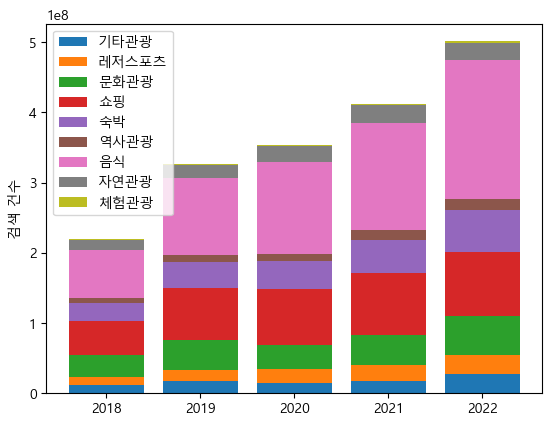

In [143]:
#https://python-charts.com/part-whole/stacked-bar-chart-matplotlib/

# Data
groups = ['2018', '2019', '2020', '2021', '2022']
labels= ['기타관광', '레저스포츠', '문화관광', '쇼핑', '숙박', '역사관광', '음식', '자연관광', '체험관광']
values = np.array([기타관광,
                  레저스포츠,
                  문화관광,
                  쇼핑, 숙박, 역사관광, 음식, 자연관광, 체험관광])

fig, ax = plt.subplots()
# Stacked bar chart with loop
for i in range(values.shape[0]):
  ax.bar(groups, values[i], bottom = np.sum(values[:i], axis = 0), label = labels[i])
    
    
# ax.plot(groups, values[4], marker = 'o', markersize = 20, color = 'green')  


ax.legend()
ax.set_ylabel('검색 건수')
plt.show()

# Analyze '숙박' separately to find best hotel

In [134]:
accom3 = df3[(df3['티맵카테고리중분류명'] == '숙박')]
accom3

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
8,2018,전국,숙박,25327058,0
18,2019,전국,숙박,36801321,25327058
28,2020,전국,숙박,38862325,36853187
38,2021,전국,숙박,47331114,38862325
48,2022,전국,숙박,60135717,47331107


<Axes: xlabel='기준년월', ylabel='광역지자체 검색건수'>

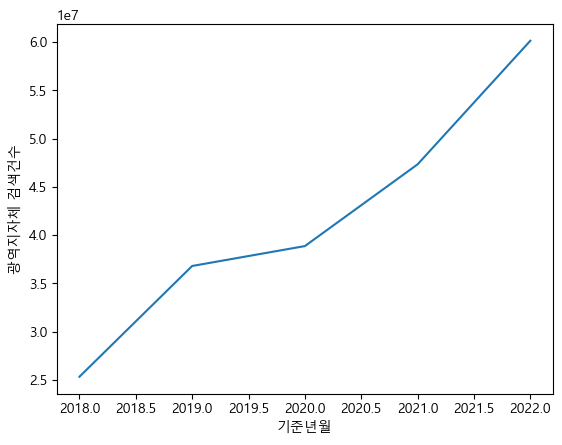

In [136]:
sns.lineplot(
    data=accom3,
    x="기준년월", y="광역지자체 검색건수",
    markers=True, dashes=False
)
